<a href="https://colab.research.google.com/github/Deca97/Real_Estate_Price_Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Un modello di previsione per il mercato immobiliare

# Caricamento librerie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")


# Caricamento del Dataset

In [ ]:
url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"
df = pd.read_csv(url)
df.info()


df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          1.089908  
std      0.861586    0.424302          0.858130  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          1.000000  
75%      1.000000    0.000000          2.000000  
max      3.000000    1.000000          2.000000

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1

# Data exploration

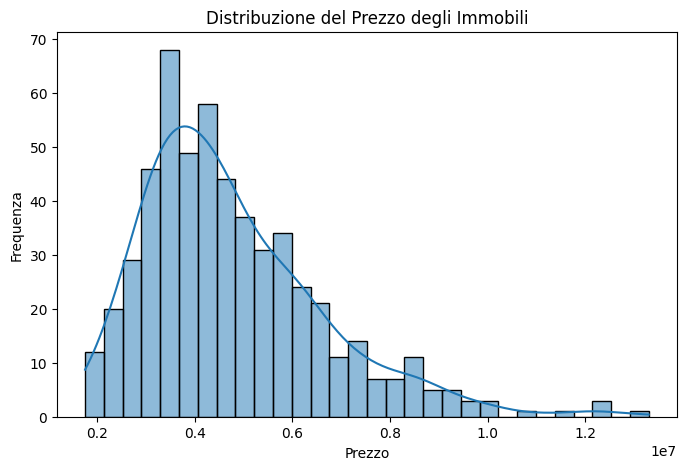

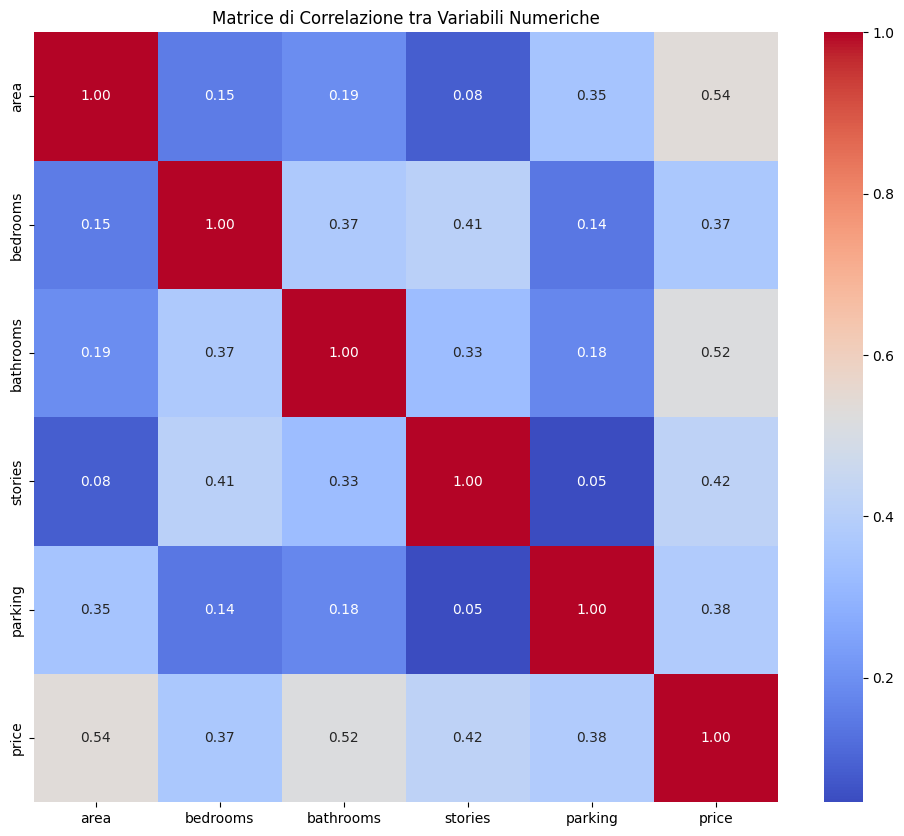

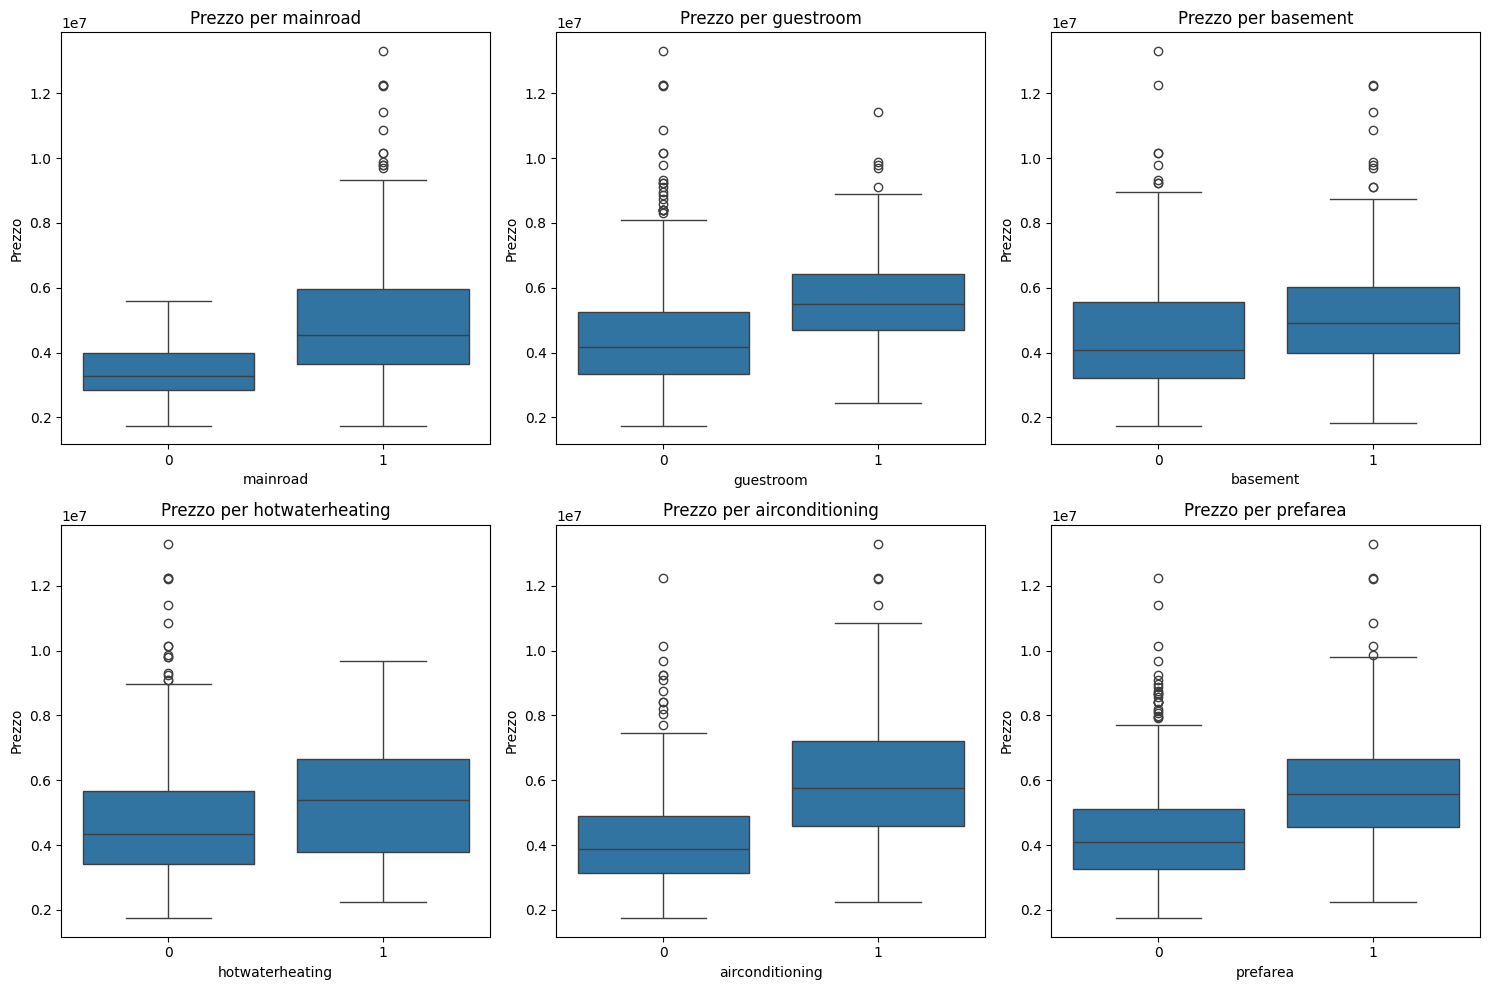

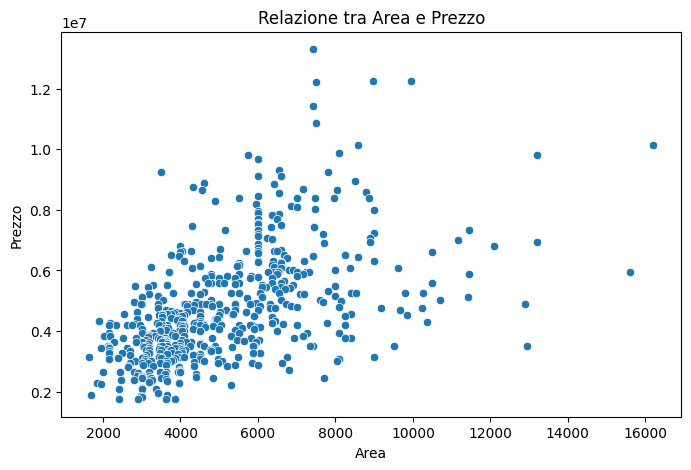

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribuzione del Prezzo degli Immobili")
plt.xlabel("Prezzo")
plt.ylabel("Frequenza")
plt.show()

# Correlazione tra le variabili numeriche
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

plt.figure(figsize=(12, 10))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione tra Variabili Numeriche")
plt.show()

binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f"Prezzo per {feature}")
    plt.xlabel(feature)
    plt.ylabel("Prezzo")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title("Relazione tra Area e Prezzo")
plt.xlabel("Area")
plt.ylabel("Prezzo")
plt.show()

* Nessuna correlazione eccessiva (>0.8), quindi il rischio di multicollinearit√† forte √® basso.

* Tutte le variabili binarie hanno un‚Äôinfluenza positiva sul prezzo, ma con intensit√† diversa (aria condizionata, guestroom e prefarea sembrano pi√π rilevanti).

* Tutte le variabili numeriche hanno un‚Äôinfluenza positiva sul prezzo, ma con intensit√† diversa (area e numero di bagni sembrano avere pi√π rilevanti).

# Model development

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_validate
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizzazione e feature names
X = df.drop('price', axis=1)
y = df['price']
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_num = df[num_features]
X_cat = df.drop(columns=num_features + ['price'])

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=num_features)

X_scaled = pd.concat([X_num_scaled, X_cat.reset_index(drop=True)], axis=1)
feature_names = X_scaled.columns



# GridSearchCV setup
param_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_elastic = {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}

grid_ridge = GridSearchCV(Ridge(max_iter=10000), param_ridge, scoring='neg_mean_squared_error', cv=5)
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_lasso, scoring='neg_mean_squared_error', cv=5)
grid_elastic = GridSearchCV(ElasticNet(max_iter=10000), param_elastic, scoring='neg_mean_squared_error', cv=5)

# Fit su tutto il dataset
grid_ridge.fit(X_scaled, y)
grid_lasso.fit(X_scaled, y)
grid_elastic.fit(X_scaled, y)

# Migliori modelli
best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_
best_elastic = grid_elastic.best_estimator_

# Dizionario per i modelli
models = {
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    'ElasticNet': best_elastic
}

# Risultati CV
results = {'Model': [], 'CV_MSE': []}
residuals = {}
coefs = pd.DataFrame({'Feature': feature_names})

for name, model in models.items():
    # Cross-validation MSE
    cv_mse = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
    results['Model'].append(name)
    results['CV_MSE'].append(cv_mse)

    # Residui da cross_val_predict
    y_pred = cross_val_predict(model, X_scaled, y, cv=5)
    residuals[name] = {'pred': y_pred, 'res': y - y_pred}

    # Coefficienti
    coefs[name] = model.coef_

# Tabella risultati CV
res_df = pd.DataFrame(results)
print("üìä MSE medio su 5 Fold:")
print(res_df)

print("üîç Migliori iperparametri trovati tramite GridSearchCV:\n")

print(f"Ridge ‚Üí alpha: {grid_ridge.best_params_['alpha']}")
print(f"Lasso ‚Üí alpha: {grid_lasso.best_params_['alpha']}")
print(f"ElasticNet ‚Üí alpha: {grid_elastic.best_params_['alpha']}, l1_ratio: {grid_elastic.best_params_['l1_ratio']}")


# Trova il modello con il miglior MSE CV
best_model_name = res_df.sort_values(by='CV_MSE').iloc[0]['Model']
print(f"‚úÖ Modello con miglior CV MSE: {best_model_name}")

# Seleziona il modello corrispondente gi√† ottimizzato
final_model = models[best_model_name]

# 3. Fitta il modello su tutto il dataset
final_model.fit(X_scaled, y)

# 4. Predizione e R¬≤
y_pred_all = final_model.predict(X_scaled)
r2_all = r2_score(y, y_pred_all)

print(f"üìà R¬≤ del modello '{best_model_name}' sull'intero dataset: {r2_all:.4f}")



üìä MSE medio su 5 Fold:
        Model        CV_MSE
0       Ridge  2.156073e+12
1       Lasso  2.156044e+12
2  ElasticNet  2.156172e+12
üîç Migliori iperparametri trovati tramite GridSearchCV:

Ridge ‚Üí alpha: 0.01
Lasso ‚Üí alpha: 0.001
ElasticNet ‚Üí alpha: 0.001, l1_ratio: 0.9
‚úÖ Modello con miglior CV MSE: Lasso
üìà R¬≤ del modello 'Lasso' sull'intero dataset: 0.6791


# üìä  Analisi dei risultati

I tre modelli hanno performance molto simili (MSE ‚âà 2.15e+12).
Il Lasso risulta il migliore, anche se di poco, con R¬≤ = 0.68, quindi spiega circa il 68% della variabilit√† del prezzo.
L‚Äôuso di Œ± molto piccolo indica che la regolarizzazione ha un impatto limitato.

# Valutazione performance del modello

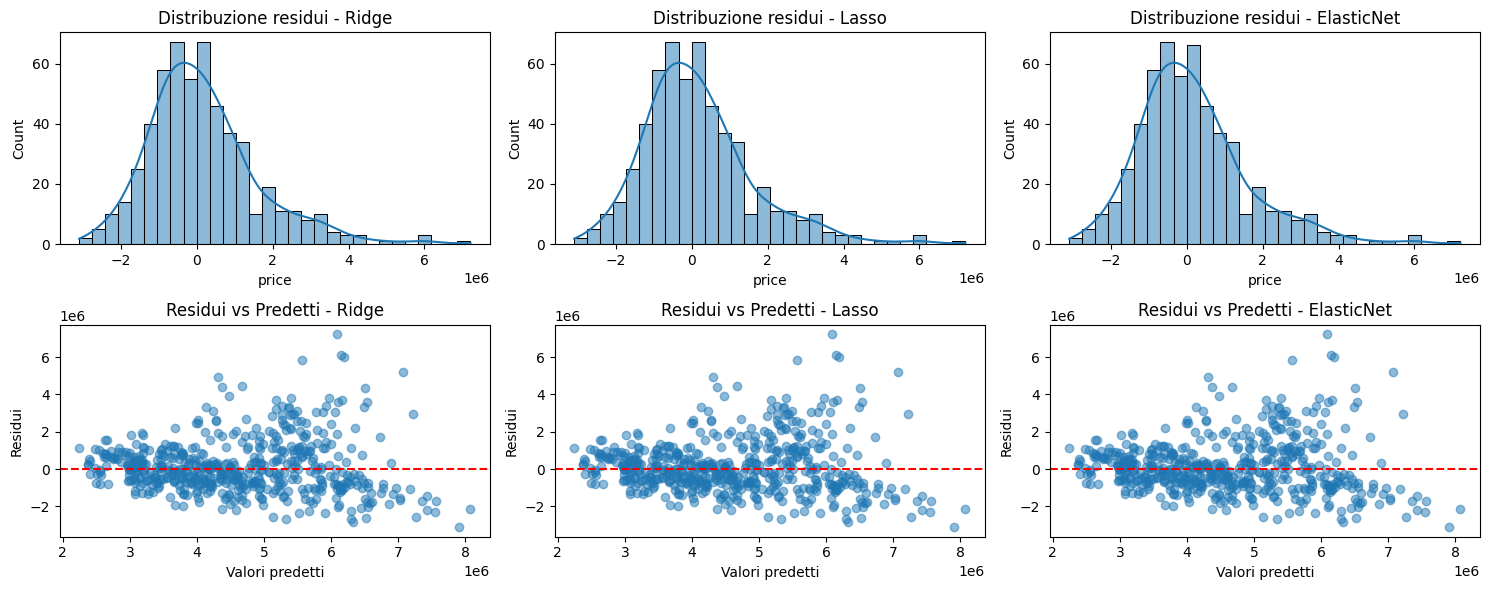

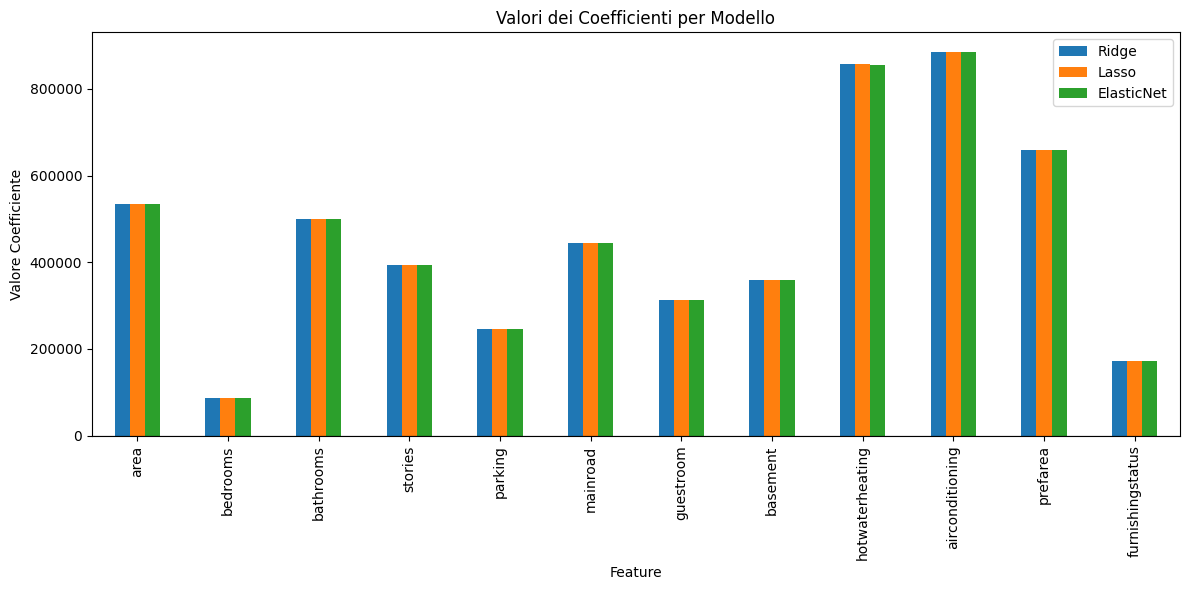

In [ ]:

# Analisi residui
plt.figure(figsize=(15, 6))
for i, (name, data) in enumerate(residuals.items()):
    plt.subplot(2, 3, i+1)
    sns.histplot(data['res'], kde=True, bins=30)
    plt.title(f"Distribuzione residui - {name}")

    plt.subplot(2, 3, i+4)
    plt.scatter(data['pred'], data['res'], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residui vs Predetti - {name}")
    plt.xlabel("Valori predetti")
    plt.ylabel("Residui")
plt.tight_layout()
plt.show()


# Grafico coefficienti
coefs.set_index('Feature')[['Ridge', 'Lasso', 'ElasticNet']].plot(kind='bar', figsize=(12,6))
plt.title("Valori dei Coefficienti per Modello")
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valore Coefficiente")
plt.tight_layout()
plt.show()

# üìä Analisi dei residui

I modelli catturano bene la tendenza generale, ma hanno difficolt√† con le case pi√π costose, introducendo errori crescenti su quella fascia di valori.